In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
from torch.autograd import Variable

In [2]:
torch.normal?

In [3]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

In [9]:
print x.size(), y.size()

torch.Size([200, 2]) torch.Size([200])


In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [6]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = torch.nn.CrossEntropyLoss() 

Net (
  (hidden): Linear (2 -> 10)
  (out): Linear (10 -> 2)
)


In [7]:
x = Variable(x, requires_grad=True)
y = Variable(y)

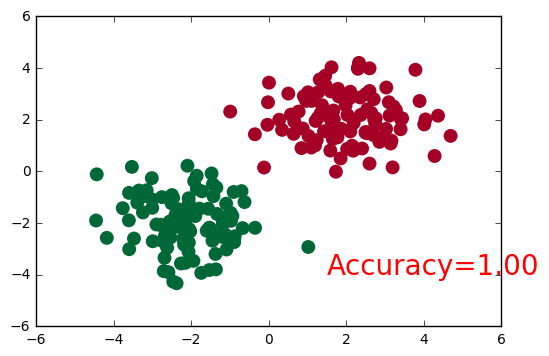

In [12]:

for t in range(1):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        # plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.show()

In [13]:
torch.save(net, 'net.pkl')
# torch.save(net.load_state_dict(), 'net_params.pkl')

/usr/local/lib/python2.7/dist-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
